# Graded Assignment 2 - Reaction times<span class="tocSkip"></span>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-1">Assignment</a></span><ul class="toc-item"><li><span><a href="#Organizational-matters" data-toc-modified-id="Organizational-matters-1.1">Organizational matters</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.2">Introduction</a></span></li><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1.3">Problem statement</a></span></li><li><span><a href="#Your-tasks" data-toc-modified-id="Your-tasks-1.4">Your tasks</a></span></li><li><span><a href="#Steps" data-toc-modified-id="Steps-1.5">Steps</a></span></li><li><span><a href="#Mouse-experiment" data-toc-modified-id="Mouse-experiment-1.6">Mouse experiment</a></span></li><li><span><a href="#The-dataset" data-toc-modified-id="The-dataset-1.7">The dataset</a></span></li></ul></li><li><span><a href="#Your-code" data-toc-modified-id="Your-code-2">Your code</a></span><ul class="toc-item"><li><span><a href="#Loading-the-libraries" data-toc-modified-id="Loading-the-libraries-2.1">Loading the libraries</a></span></li><li><span><a href="#Step-1.-Re-organize-the-dataset" data-toc-modified-id="Step-1.-Re-organize-the-dataset-2.2">Step 1. Re-organize the dataset</a></span></li><li><span><a href="#Step-2.-Define-reaction-times" data-toc-modified-id="Step-2.-Define-reaction-times-2.3">Step 2. Define reaction times</a></span></li><li><span><a href="#Step-3.-Perform-tests-on-the-data-to-see-if-it-meets-expectations" data-toc-modified-id="Step-3.-Perform-tests-on-the-data-to-see-if-it-meets-expectations-2.4">Step 3. Perform tests on the data to see if it meets expectations</a></span></li><li><span><a href="#Step-4.-Clean-the-data" data-toc-modified-id="Step-4.-Clean-the-data-2.5">Step 4. Clean the data</a></span></li><li><span><a href="#Step-5.-Exploratory-data-analysis-and-visualization" data-toc-modified-id="Step-5.-Exploratory-data-analysis-and-visualization-2.6">Step 5. Exploratory data analysis and visualization</a></span></li><li><span><a href="#Step-6.-Formulate-and-test-a-hypothesis" data-toc-modified-id="Step-6.-Formulate-and-test-a-hypothesis-2.7">Step 6. Formulate and test a hypothesis</a></span></li><li><span><a href="#Extra-code-for-the-poster" data-toc-modified-id="Extra-code-for-the-poster-2.8">Extra code for the poster</a></span></li></ul></li><li><span><a href="#List-of-all-defined-names" data-toc-modified-id="List-of-all-defined-names-3">List of all defined names</a></span></li><li><span><a href="#(End-of-Notebook)" data-toc-modified-id="(End-of-Notebook)-4">(End of Notebook)</a></span></li></ul></div>


**Do not write anything _outside_ marker lines `BEGIN_TODO ... END_TODO`**.

## Introduction

If a new message appears on your phone, you want to be able to react easily and quickly. In a computer game, your reaction time may be the difference between winning and losing. In some jobs, reaction time is important as well: a pilot needs to be able to quickly respond to changing situations on the screen.

## Problem statement

In this assignment, we will investigate to what extent the reaction time is related to the difficulty of the task. We will base the investigation on the large amount of **mouse experiment** data that we have collected earlier in the course (described below).



## Your tasks

- Read the description of the mouse experiment in the "mouse experiment" assignment on Canvas.
- Think of a feature in the data, or that you can compute on the data, that somehow expresses the difficulty of the task for the user.
- Formulate a hypothesis about the relation between the chosen feature and the reaction time, and test the hypothesis.
- Investigate both the absolute values of the reaction time in seconds and the proportion the reaction time makes up of the duration of the whole movement.

## Steps

In this assignment, we will go through the following steps.

1. Re-organize the dataset
2. Define reaction time
3. Perform tests on the data to see if it meets our expectations
4. Clean the data
5. Explore the data to find a feature to investigate
6. Formulate and test a hypothesis

---

## Mouse experiment

In the mouse experiment, we collected data on mouse and trackpad usage by a small computer program. The same computer program was also used in the DAS programming exercises. It worked as follows.

First, the program asked the user to enter some basic information, for instance the study major of the user,  whether the user would ordinarily write with the right or left hand, would ordinarily use the mouse with the right or the left hand, or would use the trackpad with the right or the left hand.

The experiment itself worked as follows. The user was asked to move their mouse onto the square (of size $11\times11$ pixels) in the center of the window.
After some random delay, given that the user kept the mouse on the square the whole time, a target (a small disk) would appear, at a random distance from the origin in one of eight possible directions. After the target appeared, the user would move the mouse and click on the target.

![example_trajectory.png](attachment:example_trajectory.png)

Meanwhile, the program would record the trajectory of the mouse or trackpad. At (possibly irregular) time points, it gets an update from the operating system on the current position of the mouse. It then stores a list of time points, or time stamps, together with the corresponding $x$ and $y$-coordinates. The $x$-axis is horizontal, and the $y$-axis is vertical. The origin, where $(x,y)=(0,0)$, exactly corresponds to the center of the square in the middle of the screen.


The delay, target radius, target distance, and target direction are all chosen at random. The distributions are as follows.
* The delay is chosen uniformly between 2 and 4 seconds
* The target radius is sampled uniformly at random from either 3, 6 or 9 pixels
* The target distance is chosen uniformly at random from 100 to 290 pixels from the origin
* The target direction is chosen uniformly from angles -135, -90, -45, 0, 45, 90, 135, 180 degrees with respect to the positive $x$-axis

Users were encouraged to collect fifteen trajectories with a trackpad, and fifteen trajectories with a mouse. Moreover, users were instructed to use the hand that they would normally use for that input device.

## The dataset

During the mouse experiment a lot of information was collected. Note that some of it will be irrelevant for answering the question. It is part of the assignment to figure out which information is relevant.

The data for this assignment resides in the SQLite database `datasets/mouse_experiment.db`. It contains three tables: **paths**, **trials** and **users**, described below.

###  The <font color="red">paths</font> table
This table contains information on recorded mouse trajectories. Every row corresponds to a point on the path, and it contains the following information.

|Field  | Type | Description | 
|:-------|:----|:----|
|user| int | user id |
|trial| int | trial number for this user|
|t | int | time in s since the moment the target was shown |
|x| int | x-coordinate in pixels | 
|y| int | y-coordinate in pixels |

Every path starts at time $t=0$, and at a location close to the origin $(x,y) = (0,0)$.

###  The <font color="red">trials</font> table
A row in this table contains information about a particular trajectory.

|Field  | Type | Description | 
|:-------|:----|:----|
|user| int | user id |
|trial| int | trial number for this user |
|delay| float | the delay in seconds between the hovering over middle square and the appearance of the target |
|input_method| int | whether input method was a trackpad (`0`) or a mouse (`1`) |
|mouse_acceleration| int | `0` if mouse acceleration is not used (\*) |
|mouse_speed_rec| int | speed setting of the mouse between `0` and `20` (`-1` if it could not be determined) |
|mouse_threshold_1| int | first acceleration parameter of the mouse (\*) |
|mouse_threshold_2| int | second acceleration parameter of the mouse (\*) |
|screen_height| int | the height of the screen in pixels |
|screen_width| int | the width of the screen in pixels |
|target_radius| int | the radius of the target in pixels |
|target_x| int | the $x$-coordinate of the target in pixels |
|target_y| int | the $y$-coordinate of the target in pixels |
|touchpad_honor| int | if `1`, touchpad honors acceleration settings of the mouse |
|touchpad_speed| int | speed setting of the touchpad between `0` and `20` (`-1` if it could not be determined) |
|trial_for_input_method| int | the number of times this particular input method was used (count started at `0`) |

(\*) See https://docs.microsoft.com/en-us/windows/win32/api/winuser/nf-winuser-mouse_event for more information on the mouse threshold and mouse acceleration parameters.

###  The <font color="red">users</font> table
A row in this table contains information about a particular user.

|Field  | Type | Description | 
|:-------|:----|:----|
|user | int | user id |
|use_laptop | int | whether a laptop was used|
|mouse_speed| int | if `1`, then user indicates having set mouse speed to medium (corresponding to speed `10`)|
|mouse_accuracy| int | if `1`, then user indicates having activated enhanced mouse accuracy |
|trackpad_speed_set| int | if `1`, then user indicates having set the trackpad speed to medium |
|right_handed | int | whether user uses right hand (`1`) or left hand (`0`) to write |
|right_trackpad_handed| int | whether user uses right hand (`1`) or left hand (`0`) for trackpad |
|right_mouse_handed| int | whether user uses right hand (`1`) or left hand (`0`) for mouse |
|major | string | the major of the user |

# Your code

* Feel free to add new cells _between_ the marker lines.
* We recommend that you keep this code _neatly organized_.
* Keep in mind that you **must not write anything _outside_ marker lines `BEGIN_TODO ... END_TODO`**.

---

## Loading the libraries

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sqlite3
from scipy import stats
from scipy.stats import *

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

## Step 1. Re-organize the dataset

1. Store the *paths*, *trials*, and *users* tables from the database in *Pandas* dataframes `df_paths`, `df_trials` and `df_users` respectively. Set the index of `df_paths` to (the multi-index) `['user', 'trial', 't']`, of `df_trials` to (the multi-index) `['user', 'trial']` and of `df_users` to `'user'`.

In [0]:
#// BEGIN_TODO [Preliminaries] (3 points)

In [0]:

conn = sqlite3.connect('/content/drive/My Drive/mouse_experiment.db')

df_paths = pd.read_sql_query("SELECT * FROM paths", conn)
df_paths.set_index(['user', 'trial', 't'], inplace=True);

df_trials = pd.read_sql_query("SELECT * FROM trials", conn)
df_trials.set_index(['user', 'trial'], inplace=True);

df_users = pd.read_sql_query("SELECT * FROM users", conn)
df_users.set_index("user");

In [0]:
#// END_TODO [Preliminaries]

## Step 2. Define reaction times

How should we define the reaction time?

### 2.1 First definition of reaction time

Let us first investigate the following suggested definition: the reaction time for a trial is the first nonzero time stamp in the paths table. The reason for this choice is the following: the operating system only sends updates on the mouse position to the computer program if the mouse is actually moved. This would therefore correspond to the first time the mouse is moved after the target appeared.

1. Use an SQL query to create a table with columns containing the user id, the trial id and the reaction time according to this definition. Store the query itself as a string in a variable `query_reaction_1`. Store the table in a dataframe named `df_reaction_1`. Rename the columns to `'user'`, `'trial'` and `'reaction_time_1'`. Set the index of `df_reaction_1` to `['user', 'trial']`.

2. Make a violin plot or density plot of the reaction time according to this definition. Make sure to pick a good range for the $x$-axis.

In [0]:
#// BEGIN_TODO [Reaction_Time_1] (6 points)

In [0]:
query_reaction_1 = '''
SELECT user, trial, MIN(t) AS 'reaction_time_1'
FROM paths
WHERE t>0
GROUP BY user, trial
'''

In [27]:
df_reaction_1 = pd.read_sql_query(query_reaction_1, conn)
df_reaction_1.set_index(['user','trial'], inplace=True)
df_reaction_1

reaction_time_1
user trial                 
1    5             0.324846
     6             0.393842
     7             0.423749
     8             0.443900
     9             0.367530
...                     ...
2995 30            0.991101
     31            0.772922
     32            1.523124
     33            0.612417
     34            0.598583

[29295 rows x 1 columns]

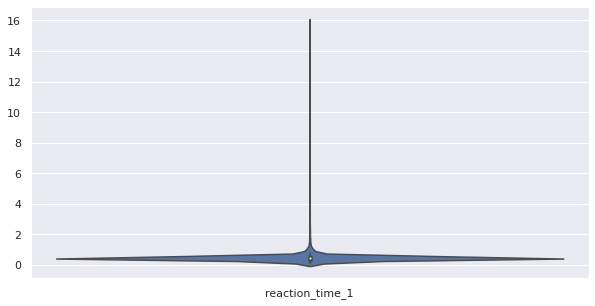

In [28]:
sns.violinplot(data=df_reaction_1)

In [0]:
#// END_TODO [Reaction_Time_1]

3. What is surprising about the above graph? Can you find an explanation for it? Store your answer in a string called `surprising`.

In [0]:
#// BEGIN_TODO [Surprising]

surprising = 'Majority of the data is under around 1 second, with surprisingly having extreme outliers found at the 16 second mark.'
#// END_TODO [Surprising]

### 2.2 Second definition of reaction time

The previous definition of reaction time does not seem to express the reaction time very well.

As a second definition, consider the time it takes from when the target appears ($t=0$), until the trajectory is outside the circle with radius **`10` pixels** around the origin $(x=0, y=0)$. (The reason for choosing `10` pixels is that a radius of 10 pixels is approximately the smallest circle that fits the square around the origin on which the user needs to hold the mouse before the target appears).

1. Use an SQL query to create a table with columns containing the **user id**, the **trial id** and **the reaction time** according to this second definition. Store the query itself as a string in a variable `query_reaction_2`. Store the table in a dataframe named `df_reaction_2`. Rename the columns to `'user'`, `'trial'` and `'reaction_time_2'`. Set the index of `reaction_time_2` to `['user', 'trial']`.

2. Compare the two density plots of the reaction times in one figure.

In [0]:
#// BEGIN_TODO [Reaction_Time_2] (6 points)

In [0]:
query_reaction_2 = '''
SELECT user, trial, MIN(t) AS 'reaction_time_2'
FROM paths
WHERE x*x + y*y >= 100
GROUP BY user, trial;
'''

In [0]:
df_reaction_2 = pd.read_sql_query(query_reaction_2, conn)
df_reaction_2.set_index(['user','trial'], inplace=True)
df_reaction_2;

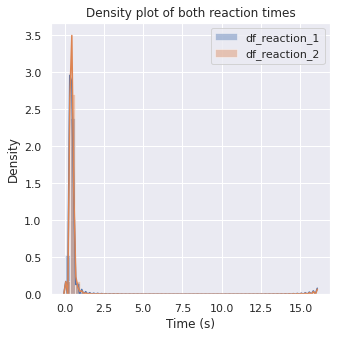

In [34]:

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, squeeze=False, figsize=(5,5))
sns.distplot(df_reaction_1, ax=ax[0,0])
sns.distplot(df_reaction_2, ax=ax[0,0])
ax[0, 0].set_title('Density plot of both reaction times')
ax[0, 0].set_xlabel('Time (s)')
ax[0, 0].set_ylabel('Density')
ax[0,0].legend(['df_reaction_1','df_reaction_2'])

In [0]:
#// END_TODO [Reaction_Time_2]

3. How do the two definitions of reaction time compare? Store your answer in a string called `comparison_definitions`.

In [0]:
#// BEGIN_TODO [Compare_definitions]

comparison_definitions = 'Reaction time one is shorter than reaction time two, which makes sense as the second definition is after it has left the staging area. The first definition may record people who move the mouse by a single pixel, with the second being more accurate as to having left the origin area (target does not show if you leave too early)'

#// END_TODO [Compare_definitions]

> **Note:** from now on, we will follow the **second** definition of the reaction time

## Step 3. Perform tests on the data to see if it meets expectations

After collecting a large amount of data as in the mouse experiment, one should check whether the gathered data meets some basic expectations, for instance on how much time the paths take to complete and how long they are. If some of the data does not meet the expectations, we will look into the reason why.

### 3.1 Formulate expectations

We will look at two quantities:
* the **total time** it takes to complete a path (as paths start at $t=0$, this corresponds to the maximum recorded time point for a given path)
* the **length factor**, by which we mean the length of a path (the sum of all lengths of line segments between consecutive recorded points) divided by the distance between origin and (center of the) target

Record your expectations on these quantities in the following variables:
* `expected_max_total_time` : the maximum time (in seconds) it would take to complete a reasonable path
* `expected_max_length_factor` : how many times a reasonable path can be longer than the distance between origin and target

Here, a 'reasonable' path is not very well defined, but think of a path created by a user who was aiming to seriously completing the task, and there were no technical difficulties occurring.

In [0]:
#// BEGIN_TODO [Record_expectations] (1 point)

In [0]:
expected_max_total_time=2.5
expected_max_length_factor=1.3

In [0]:
#// END_TODO [Record_expectations]

### 3.2 Check expectations

Now, for each of the criteria, compute how many paths violate your expectations. Store your answers in the variables `nr_more_time_than_expected` and `nr_longer_than_expected`. Moreover, store the results of the computation of the *total time* and *length factor* in the `df_trials` dataframe, with labels `'total_time'` and `'length_factor'`.

> **Hint:** Stay away from using "for-loops", and instead use _Pandas_ functions for your computations.

In [0]:
#// BEGIN_TODO [Check_expectations] (6 points)

In [41]:
total_time = df_paths.reset_index()
total_time = total_time.groupby(['user','trial'], sort=False)['t'].max()
df_trials = df_trials.merge(total_time, left_on=['user','trial'], right_on=['user','trial'])
df_trials.rename(columns={'t':'total_time'}, inplace=True)
df_trials




delay  input_method  ...  trial_for_input_method  total_time
user trial                          ...                                    
1226 5      2.136719             0  ...                       5    3.607323
     6      3.540913             0  ...                       6    1.867664
     7      3.688381             0  ...                       7    1.645011
     8      2.823134             0  ...                       8    1.776010
     9      3.690253             0  ...                       9    1.567794
...              ...           ...  ...                     ...         ...
1131 50     3.160624             0  ...                      10    1.204643
     51     3.902326             0  ...                      11    1.387911
     52     2.491886             0  ...                      12    1.598877
     53     3.061265             0  ...                      13    1.496332
     54     3.187951             0  ...                      14    3.612951

[29295 rows x 15 columns]

In [42]:
df_paths
temp = df_paths
distances = np.sqrt(np.power(temp['x'].shift()-temp['x'],2) + np.power(temp['y'].shift()-temp['y'],2))
distances = distances.groupby(['user','trial']).sum()
#dis
origin_distances = np.sqrt(np.power(0-df_trials['target_x'],2) + np.power(0-df_trials['target_y'],2))
length_factor = distances/origin_distances
length_factor
df_trials = df_trials.merge(length_factor.rename('length_factor'), left_on=['user','trial'], right_on=['user','trial'])
df_trials


nr_more_time_than_expected = df_trials[total_time > expected_max_total_time] 
nr_longer_than_expected = df_trials[length_factor > expected_max_length_factor]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [0]:
#// END_TODO [Check_expectations]

### 3.3 Investigate what happens

To get more insight into why certain paths do not correspond to your expectations, first make density plots that give you an idea of the distribution of the total time and the length factor. You may also perform further investigations into what is going on, e.g. inspect a few paths.

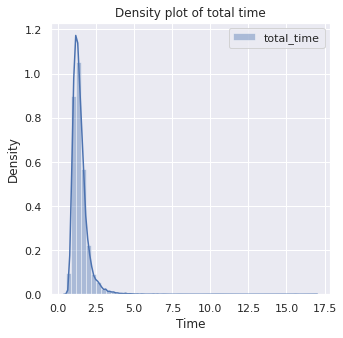

In [44]:
#// BEGIN_TODO [Investigate] (1 point)


fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, squeeze=False, figsize=(5,5))
sns.distplot(total_time, ax=ax[0,0])
ax[0, 0].set_title('Density plot of total time')
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Density')
ax[0,0].legend(['total_time'])

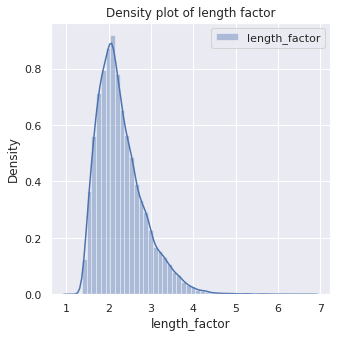

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, squeeze=False, figsize=(5,5))
sns.distplot(length_factor, ax=ax[0,0])
ax[0, 0].set_title('Density plot of length factor')
ax[0, 0].set_xlabel('length_factor')
ax[0, 0].set_ylabel('Density')
ax[0,0].legend(['length_factor'])

In [0]:
#// END_TODO [Investigate]

## Step 4. Clean the data

After checking your expectations above, it is likely that you have seen that there are quite a few paths different from expected. There could be several reasons for this; some paths won't correspond to serious trials, in others the experiment may have been interrupted or there could have been some technical failure. 

When we want to investigate the relationship between the reaction time and the difficulty of the task, we do not want to include such paths, i.e. paths that do not correspond to proper trials. They would largely distort our conclusions. We consider those paths **outliers**.

### Define outliers

However, it is always hard to _define_ what is an outlier: we need to realize that sometimes experiments may give surprising results and we should not discard them.

Provide a definition of what is an outlier for the purpose of the current investigation, by storing
* an upper bound on the reaction time in seconds in the variable `upper_bound_reaction_time`,
* an upper bound on the total time in seconds in the variable `upper_bound_total_time`, 
* an upper bound on the length factor in the variable `upper_bound_length_factor`.

Given the provided values, an outlier will be defined as a path for which the reaction time is longer than `upper_bound_reaction_time`, **or** the total time is more than `upper_bound_total_time`, **or** the length factor is more than `upper_bound_length_factor` (all inequalities are assumed to be strict inequalities).

> You have provided variables `expected_max_total_time` and `expected_max_length_factor` before. These were initial estimates. You can view `upper_bound_total_time` and `upper_bound_length_factor` as refinements of these initial estimates, based on your investigations in the previous step.

> **Poster**: Make sure to motivate your choice on the poster.

In [0]:
#// BEGIN_TODO [Define_Outliers] (1 point)
upper_bound_total_time = 2.5
upper_bound_length_factor = 3
upper_bound_reaction_time = 2.6




In [0]:
#// END_TODO [Define_Outliers]

### Remove outliers

Given your definition of outliers in the previous section, create a new dataframe `df_trials_clean` which is the dataframe `df_trials` but with outliers removed.

In [49]:
df_reaction_2
temp = df_reaction_2[df_reaction_2['reaction_time_2'] < upper_bound_reaction_time]
temp.reset_index()
temp

reaction_time_2
user trial                 
1    5             0.364838
     6             0.418160
     7             0.455672
     8             0.476387
     9             0.391309
...                     ...
2995 30            0.991101
     31            0.785528
     32            1.523124
     33            0.626301
     34            0.610010

[29234 rows x 1 columns]

In [50]:
#// BEGIN_TODO [Remove_Outliers] (3 points)

df_trials_clean = df_trials[ df_trials['length_factor'] < upper_bound_length_factor] 
df_trials_clean =  df_trials_clean[ df_trials_clean['total_time'] < upper_bound_total_time]
df_trials_clean = pd.merge(df_trials_clean,temp,on=['user','trial'],how='inner')
df_trials_clean


delay  input_method  ...  length_factor  reaction_time_2
user trial                          ...                                
1226 6      3.540913             0  ...       1.707103         0.551264
     7      3.688381             0  ...       1.909881         0.529978
     9      3.690253             0  ...       1.550926         0.538751
     10     3.768077             0  ...       1.880093         0.522799
     11     2.792111             0  ...       2.075933         0.791457
...              ...           ...  ...            ...              ...
1131 48     3.065997             0  ...       2.146048         0.533605
     50     3.160624             0  ...       1.524089         0.440187
     51     3.902326             0  ...       2.405152         0.499868
     52     2.491886             0  ...       2.082097         0.458587
     53     3.061265             0  ...       1.955444         0.501214

[25228 rows x 17 columns]

In [0]:
#// END_TODO [Remove_Outliers]

We now create, based on your solution above, new dataframes `df_paths_clean` and `df_users_clean` which are the `df_paths` and `df_users` dataframes but with outliers removed.

In [0]:
df_paths_clean = df_paths[df_paths.index.droplevel('t').isin(df_trials.index)].copy()
df_users_clean = df_users[df_users.index.isin(df_trials.index.get_level_values('user').unique())].copy()

## Step 5. Exploratory data analysis and visualization

In the next step of the assignment (step 6), you will investigate (by formulating and testing a hypothesis) the relationship between the reaction time and a feature of your choice, that expresses the difficulty of the task. To do so, it will be necessary to select (or compute) a feature in the data that expresses the difficulty of the task.

Here are some suggestions for possible features, but you are free to think of and compute another feature yourself:
* The size of the target: For a fixed input method (trackpad or mouse), and one of the eight possible directions, you could investigate the influence of the size of the target on the reaction time
* The direction of target: For a fixed input method, and for one fixed target size, you could compare two out of the eight possible directions
* The direction of the target, taking into account the hand the user uses for the mouse: Perhaps it is harder for a right-handed person to move the mouse to the left, while it may be easier for a left-handed person
* The distance of the target to the origin: For a fixed input method, and one of eight possible directions, you could investigate the influence of the distance between the target and the origin on the reaction time

> **Poster**: Make sure to motivate your choice on the poster.

### Exploratory data analysis

You can use this section to explore what would be a good feature to investigate, and get an initial idea about its relationship to the reaction time.

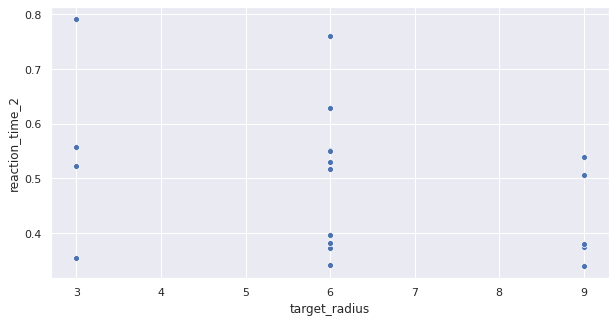

In [53]:
#// BEGIN_TODO [EDA] (1 point)

sns.scatterplot(x=   df_trials_clean['target_radius'].head(n=20) , y=df_reaction_2['reaction_time_2'])

In [0]:
#// END_TODO [EDA]

### Decide on a feature to investigate

Assign the name of the feature that you want to investigate as a string to a variable `feature`.

In [0]:
#// BEGIN_TODO [Decide_Feat] (1 point)

feature = "target_radius"

#// END_TODO [Decide_Feat]

### Create visualizations

Use this section to create 
* a visualization that describes the relationship between the reaction time in seconds and the feature that you chose
* a visualization that describes the relationship between the reaction time, but now as a proportion of the total time, and the feature that you chose.

> **Poster:** Use these visualizations on your poster. Make sure that the pictures you use on the poster _exactly_ correspond to the ones that you see on Momotor after it processes your notebook.

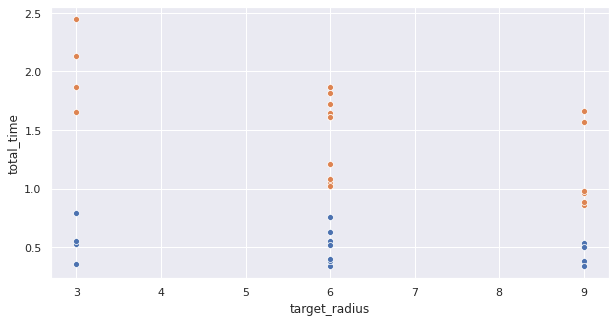

In [56]:
#// BEGIN_TODO [Vis] (1 point)

sns.scatterplot(x=   df_trials_clean['target_radius'].head(n=20) , y=df_reaction_2['reaction_time_2'])
sns.scatterplot(x=   df_trials_clean['target_radius'].head(n=20) , y=df_trials_clean['total_time'])




In [0]:
#// END_TODO [Vis]

## Step 6. Formulate and test a hypothesis

Formulate a null hypothesis and an alternative hypothesis. Store the null and alternative hypotheses as strings to variables `H_0` and `H_a` respectively. Consider either the reaction time in seconds, or the reaction time as a proportion of the total time of the trajectory.

In [0]:
#// BEGIN_TODO [Hypotheses] (1 point)
H_0 = "reaction time has no relation with target radius"
H_1 = "reaction time decreases with target radius"
# ===== =====> Replace this line by your code. <===== ===== #


In [0]:
#// END_TODO [Hypotheses]

Think about what type of test you want to use to test your hypothesis. Do you need to check certain conditions before you are allowed to test the hypothesis? If so, do so between the following TODO-markers.

In [0]:
#// BEGIN_TODO [Hyp_cond]

# ===== =====> Replace this line by your code. <===== ===== #


In [0]:
#// END_TODO [Hyp_cond]

Finally perform the hypothesis test. Report the p-value of your test in the variable `pvalue`.

In [65]:
#// BEGIN_TODO [Hyp_test] (2 points)

from statsmodels.stats.weightstats import ttest_ind

ttest = ttest_ind(df_trials_clean['target_radius'].head(n=20),df_trials_clean['total_time'])
pvalue = ttest[1]
pvalue

0.0

In [0]:
#// END_TODO [Hyp_test]

## Extra code for the poster

You are required to write all extra code you used to make the poster between the marker lines labeled `[Poster]` below. In particular, make sure all extra visualizations on your poster are visible here.

In [0]:
#// BEGIN_TODO [Poster] Room for text and code concerning your poster

# ===== =====> Replace this line by your code. <===== ===== #


In [0]:
#// END_TODO [Poster]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [0]:
#// BEGIN_TODO [Feedback_1] (0 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 1 - 10, with 1 being very easy.

In [0]:
#// BEGIN_TODO [Feedback_2] (0 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [0]:
#// BEGIN_TODO [Feedback_3] (0 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear or wrong with them.

In [0]:
#// BEGIN_TODO [Feedback_4] (0 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [Feedback_4] (0 point)




## How to submit your work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.

2. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your identification number.

3. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.

* In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  
* If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.


---

# List of all defined names

In [0]:
%whos

---

# (End of Notebook)